# Data Mining: Klasifikasi Kelulusan Mahasiswa (Decision Tree)

Notebook ini bertujuan untuk membuat model otomatis yang bisa memprediksi apakah seorang mahasiswa akan **Lulus** atau **Tidak Lulus** berdasarkan data akademiknya.

**Alur Proses:**
1.  **Load Data:** Mengambil data dari file CSV.
2.  **Preprocessing:** Mengubah data mentah menjadi format angka yang dipahami komputer.
3.  **Modeling:** Melatih algoritma Decision Tree untuk mencari pola.
4.  **Visualisasi & Prediksi:** Melihat aturan yang terbentuk dan menguji data baru.

## 1. Import Library dan Upload Data

### Penjelasan Fungsi:
- **`pandas`**: Library utama untuk mengolah data tabel (seperti Excel). Kita menggunakannya untuk membaca file CSV.
- **`files.upload()`**: Fungsi khusus Google Colab yang memunculkan tombol upload agar Anda bisa memilih file dari komputer lokal.
- **`io.BytesIO`**: Membaca file biner yang diupload agar bisa dibaca oleh pandas.
- **`read_csv()`**: Mengubah file teks CSV menjadi variabel DataFrame (`df`) agar bisa diolah secara baris dan kolom.

### Output yang Diharapkan:
Sebuah tabel data (**DataFrame**) yang berisi kolom `IPK`, `Kehadiran_Persen`, `Jumlah_SKS`, dan `Lulus`.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

print("Mode Google Colab. Silakan upload file CSV Anda:")

# 1. Memicu tombol upload
uploaded = files.upload()

# 2. Cek apakah ada file yang diupload
if uploaded:
    # Mengambil file pertama yang diupload
    filename = next(iter(uploaded))

    # Membaca file ke Pandas
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"\nSukses! File '{filename}' berhasil dibaca.")

    # Preview Data
    print("\nPreview Data:")
    display(df.head())
else:
    print("\nTidak ada file yang diupload. Silakan ulangi cell ini.")

Mode Google Colab. Silakan upload file CSV Anda:


Saving data_mahasiswa.csv to data_mahasiswa (1).csv

Sukses! File 'data_mahasiswa (1).csv' berhasil dibaca.

Preview Data:


,IPK,Kehadiran_Persen,Jumlah_SKS,Lulus
0,2.30,81,124,Tidak Lulus
1,2.17,97,156,Tidak Lulus
2,1.85,78,127,Tidak Lulus
3,1.65,83,110,Tidak Lulus
4,1.88,65,139,Tidak Lulus


## 2. Preprocessing Data (Persiapan)

### Penjelasan Fungsi:
- **Pemisahan X dan y**:
  - `X` (Fitur): Data yang digunakan untuk memprediksi (IPK, Kehadiran, SKS).
  - `y` (Target): Hasil yang ingin ditebak (Status Lulus).
- **`LabelEncoder`**: Mengubah data teks menjadi angka. Komputer tidak mengerti kata "Lulus" atau "Tidak Lulus", jadi kita ubah menjadi `0` dan `1`.
- **`train_test_split`**: Membagi data menjadi dua bagian:
  - **Data Latih (Train 80%)**: Digunakan model untuk belajar pola.
  - **Data Uji (Test 20%)**: Disembunyikan saat belajar, digunakan nanti untuk menguji seberapa pintar model tersebut.

### Output yang Diharapkan:
Empat variabel utama: `X_train`, `X_test`, `y_train`, `y_test` yang siap dimasukkan ke dalam algoritma.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if 'df' in locals():
    # 1. Memisahkan Fitur dan Target
    X = df[['IPK', 'Kehadiran_Persen', 'Jumlah_SKS']]
    y = df['Lulus']

    # 2. Mengubah Label Teks ke Angka
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Menampilkan peta perubahan (misal: Lulus=0, Tidak=1)
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping Label: {mapping}")

    # 3. Membagi Data Training & Testing
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    print("Data siap untuk modeling.")
else:
    print("Jalankan cell sebelumnya dulu.")

Mapping Label: {'Lulus': np.int64(0), 'Tidak Lulus': np.int64(1)}
Data siap untuk modeling.


## 3. Modeling dan Evaluasi

### Penjelasan Fungsi:
- **`DecisionTreeClassifier`**: Memanggil algoritma Pohon Keputusan.
- **`.fit(X_train, y_train)`**: Proses **PELATIHAN**. Di sini model mencari pola (misal: "Jika SKS < 120, maka Tidak Lulus").
- **`.predict(X_test)`**: Model diminta menebak status kelulusan untuk data uji.
- **`accuracy_score`**: Membandingkan tebakan model dengan kunci jawaban asli (`y_test`).

### Output yang Diharapkan:
- **Nilai Akurasi**: Persentase kebenaran model (misal: 100%).
- **Laporan Klasifikasi**: Detail performa model.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

if 'X_train' in locals():
    # 1. Membuat & Melatih Model
    model = DecisionTreeClassifier(criterion='gini', random_state=42)
    model.fit(X_train, y_train)

    # 2. Prediksi Data Uji
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Akurasi Model: {acc * 100}%")
    print("\nDetail Laporan:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
else:
    print("Data training tidak ada.")

Akurasi Model: 100.0%

Detail Laporan:
              precision    recall  f1-score   support

       Lulus       1.00      1.00      1.00        15
 Tidak Lulus       1.00      1.00      1.00        85

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 4. Visualisasi & Prediksi Manual

### Penjelasan Fungsi:
- **`plot_tree`**: Menggambar struktur pohon keputusan yang terbentuk. Ini membantu kita memahami **LOGIKA** apa yang dipakai komputer untuk menentukan kelulusan.
- **Prediksi Manual**: Kita membuat data dummy (mahasiswa rekayasa) untuk melihat bagaimana model merespons data baru.
- **`inverse_transform`**: Mengembalikan hasil prediksi yang tadinya angka (0/1) kembali menjadi teks yang bisa dibaca manusia ("Lulus"/"Tidak Lulus").

### Output yang Diharapkan:
- **Gambar Pohon Keputusan**: Diagram alur logika.
- **Hasil Prediksi**: Status kelulusan untuk data simulasi yang kita masukkan.

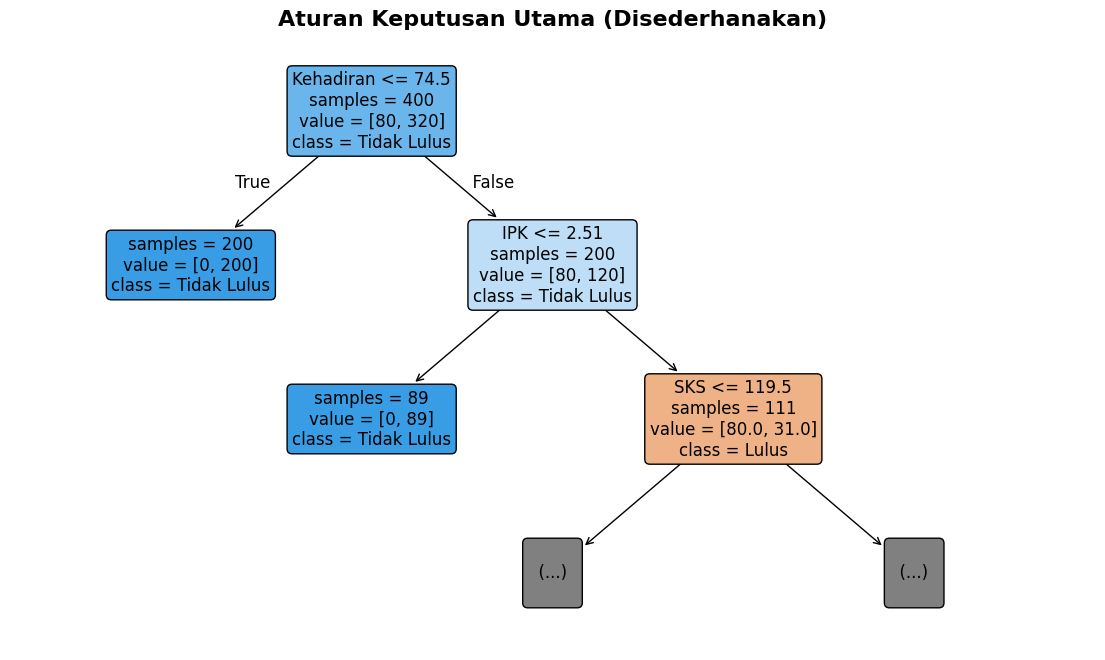


=== SIMULASI DATA BARU ===
Data Input : IPK=3.1, Kehadiran=80.0%, SKS=140.0
Prediksi   : Lulus


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

if 'model' in locals():
    # --- 1. Visualisasi Pohon Simpel ---
    plt.figure(figsize=(14, 8), dpi=100) # Ukuran gambar diperbesar

    plot_tree(model,
              feature_names=['IPK', 'Kehadiran', 'SKS'],
              class_names=le.classes_,
              filled=True,      # Memberi warna (Biru/Oranye)
              rounded=True,     # Sudut kotak tumpul (lebih rapi)

              # -- BAGIAN PENYEDERHANAAN --
              max_depth=2,      # Hanya tampilkan 2 level teratas (Zoom Out)
              impurity=False,   # Hilangkan tulisan 'gini=...' (Rumus matematika)
              fontsize=12,      # Ukuran huruf diperbesar
              precision=2       # Batasi angka desimal (misal 2.45, bukan 2.45123)
             )

    plt.title("Aturan Keputusan Utama (Disederhanakan)", fontsize=16, fontweight='bold')
    plt.show()

    # --- 2. Tes Prediksi Manual ---
    # Input: [IPK, Kehadiran, SKS]
    input_mahasiswa = np.array([[3.1, 80, 140]])

    hasil_angka = model.predict(input_mahasiswa)
    hasil_teks = le.inverse_transform(hasil_angka)[0]

    print(f"\n=== SIMULASI DATA BARU ===")
    print(f"Data Input : IPK={input_mahasiswa[0][0]}, Kehadiran={input_mahasiswa[0][1]}%, SKS={input_mahasiswa[0][2]}")
    print(f"Prediksi   : {hasil_teks}")

else:
    print("Model belum dilatih. Jalankan cell sebelumnya (Training) terlebih dahulu.")